In [1]:
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load a portion of the review data
review_list = []
with open('yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= 100000:  # You can increase this if memory allows
            break
        review_list.append(json.loads(line))

review_df = pd.DataFrame(review_list)
review_df[['text', 'stars']].head()

,text,stars
0,"If you decide to eat here, just be aware it is...",3.0
1,I've taken a lot of spin classes over the year...,5.0
2,Family diner. Had the buffet. Eclectic assortm...,3.0
3,"Wow! Yummy, different, delicious. Our favo...",5.0
4,Cute interior and owner (?) gave us tour of up...,4.0


In [3]:
#Filter and Label Sentiments
# Keep only 1, 2, 4, 5-star reviews (skip neutral 3-star)
review_df = review_df[review_df['stars'] != 3]

# Label sentiment: 1 for positive (4 or 5 stars), 0 for negative (1 or 2)
review_df['label'] = review_df['stars'].apply(lambda x: 1 if x >= 4 else 0)

In [5]:
#Train/Test Split
X = review_df['text']
y = review_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
#Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      3783
           1       0.95      0.98      0.97     13945

    accuracy                           0.95     17728
   macro avg       0.94      0.90      0.92     17728
weighted avg       0.95      0.95      0.95     17728



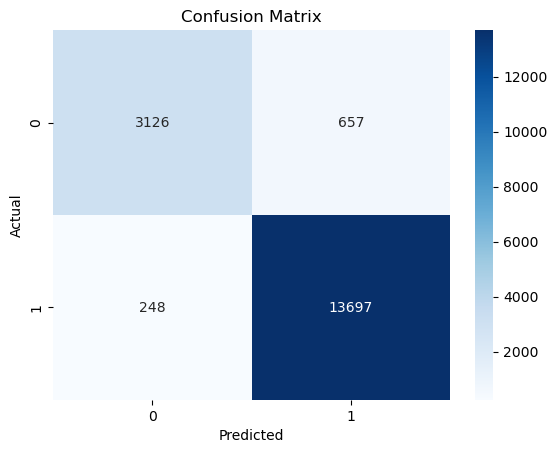

In [8]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      3783
           1       0.91      0.99      0.95     13945

    accuracy                           0.92     17728
   macro avg       0.92      0.82      0.86     17728
weighted avg       0.92      0.92      0.91     17728



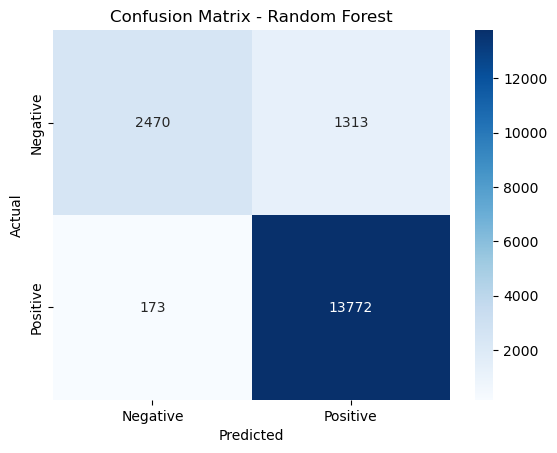

In [9]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()